In [51]:
import csv
A = ""
x = 0
with open('mergedfiles.csv', encoding="utf8") as csv_file:
    csv_reader = csv.reader(csv_file)
    for row in csv_reader:
        A = A + str(row)
        x = x + 1
        if x == 1000:
            break

print(len(A))
B = "Needs work on the P20 lite version, it's so laggy that it's unplayable"
a = len(A)
b = len(B)


115441


In [53]:
def lcs(A, B, a, b):
    
    check = [[0]*( b + 1 ) for j in range(a + 1)]
    for i in range(a + 1):
        for j in range(b + 1):
            if i == 0 or j == 0 :
                check[i][j] = 0
            elif A[i-1] == B[j-1]:
                check[i][j] = check[i-1][j-1]+1
            else:
                check[i][j] = max(check[i-1][j], check[i][j-1])

    return check[a][b]

print("Length of LCS is ", lcs(A, B, a, b))

Length of LCS is  70


In [25]:
def search(text, pattern):
    t = len(text)
    p = len(pattern)

    i = 0
    j = 0

    lps = createlps(pattern)
    while i < t:
        if pattern[j] == text[i]:
            i = i + 1
            j = j + 1
        if j == p:
            print("Plagarism has been found from index: ", (i - j), " to ", ((i - j)+p))
            j = lps[j -1]
        if i < t and pattern[j] != text[i]:
            if j != 0:
                j = lps[j-1]
            else:
                i = i + 1

def createlps(pattern):
    plength = len(pattern)
    length = 0
    i = 1
    lps = [0]*plength

    while i < plength:
        if pattern[i] == pattern[length]:
            length = length + 1
            lps[i] = length
            i = i + 1
        else:
            if length != 0:
                length = lps[length -1]
            else:
                lps[i] = length
                i = i + 1
    return lps

search(A, B)

Plagarism has been found from index:  73  to  143


Plagarism has been found from index:  73  to  143
Plagarism has been found from index:  73  to  143
Plagarism has been found from index:  73  to  143
Plagarism has been found from index:  73  to  143
Plagarism has been found from index:  73  to  143
Plagarism has been found from index:  73  to  143
Plagarism has been found from index:  73  to  143
Plagarism has been found from index:  73  to  143
Plagarism has been found from index:  73  to  143


Text(0.5, 1.0, 'KMP vs LCS')

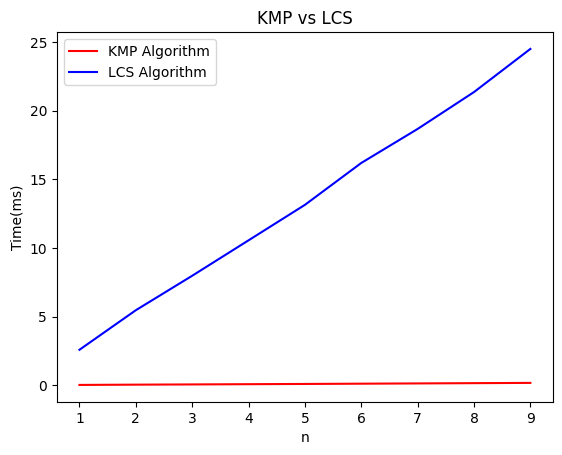

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import timeit
import math
import random

start_time = timeit.default_timer()
r = range(1, 10)
dt = []
for i in r:
    search(A, B)
    dt.append(timeit.default_timer()-start_time)
plt.plot(r,dt, color="red", label="KMP Algorithm")

start_time = timeit.default_timer()
r2 = range(1, 10)
dt2 = []
for i in r:
    lcs(A, B, a, b)
    dt2.append(timeit.default_timer()-start_time)
plt.plot(r2,dt2, color="blue", label="LCS Algorithm")
plt.xlabel("n")
plt.ylabel("Time(ms)")
plt.legend()
plt.title("KMP vs LCS")